In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os


In [138]:
df = pd.read_csv('../raw_data/train.csv')


In [139]:
pd.set_option('display.max_columns', None)


In [140]:
df.shape


(21375, 35)

In [141]:
df.columns


Index(['rating', 'playback_used', 'ebird_code', 'channels', 'date', 'pitch',
       'duration', 'filename', 'speed', 'species', 'number_of_notes', 'title',
       'secondary_labels', 'bird_seen', 'sci_name', 'location', 'latitude',
       'sampling_rate', 'type', 'elevation', 'description', 'bitrate_of_mp3',
       'file_type', 'volume', 'background', 'xc_id', 'url', 'country',
       'author', 'primary_label', 'longitude', 'length', 'time', 'recordist',
       'license'],
      dtype='object')

In [142]:
len(df.species.unique())


264

In [143]:
df.country.unique()


array(['United States', 'Canada', 'Honduras', 'Bolivia', 'Ecuador',
       'Colombia', 'Mexico', 'Chile', 'Dominican Republic', 'Brazil',
       'Guatemala', 'Argentina', 'Peru', 'Uruguay', 'Russian Federation',
       'China', 'Portugal', 'Japan', 'Azerbaijan', 'Georgia',
       'South Korea', 'Israel', 'Mongolia', 'Jamaica', 'Cuba',
       'Costa Rica', 'Sweden', 'Finland', 'Panama', 'El Salvador',
       'Nicaragua', 'Denmark', 'France', 'Uzbekistan', 'Kazakhstan',
       'Poland', 'Germany', 'Netherlands', 'Belgium', 'Italy',
       'United Kingdom', 'Norway', 'Switzerland', 'Spain', 'South Africa',
       'Ireland', 'Croatia', 'India', 'Indonesia', 'Greece', 'Cyprus',
       'Kuwait', 'Ukraine', 'Venezuela', 'Bahamas', 'Dominica',
       'New Zealand', 'Oman', 'Senegal', 'Australia', 'Jordan', 'Iran',
       'Belarus', 'Estonia', 'Iceland', 'Latvia', 'Slovakia', 'Hungary',
       'Bulgaria', 'Tunisia', 'Austria', 'Kyrgyzstan', 'French Guiana',
       'Suriname', 'Morocco', 'Bosnia

In [144]:
france_species = list(df.species[df['country'] == 'France'].unique())


In [145]:
df.describe()


,rating,duration,xc_id
count,21375.000000,21375.000000,21375.000000
mean,4.068047,55.806784,285004.752140
std,0.988122,76.385696,125160.991016
min,0.000000,0.000000,1634.000000
25%,3.500000,15.000000,174094.500000
50%,4.000000,33.000000,293438.000000
75%,5.000000,68.000000,386885.500000
max,5.000000,2283.000000,505611.000000


In [146]:
df.filename[(df['country'] == 'France') & (df['channels'] == '1 (mono)') & (df['ebird_code'] == 'barswa') ].unique()


array(['XC363068.mp3', 'XC412707.mp3', 'XC471775.mp3', 'XC471778.mp3'],
      dtype=object)

In [147]:
df.filename[(df['country'] == 'France') & (df['rating'] == 5) & (df['ebird_code'] == 'barswa') ].unique()


array(['XC156257.mp3', 'XC268755.mp3', 'XC309194.mp3', 'XC331266.mp3',
       'XC363068.mp3', 'XC378412.mp3', 'XC412707.mp3', 'XC471591.mp3',
       'XC471705.mp3', 'XC471775.mp3', 'XC471778.mp3'], dtype=object)

In [148]:
len(df['filename'][df['species'].isin(france_species)].unique())


2706

In [149]:
df_france = df[df['species'].isin(france_species)]


In [150]:
df_france['species'].value_counts().value_counts()


count
100    20
66      3
57      2
90      1
65      1
64      1
50      1
40      1
37      1
25      1
23      1
Name: count, dtype: int64

In [151]:
(df['duration'].mean()/3)*2706


50337.71883040936

In [152]:
df


,rating,playback_used,ebird_code,channels,date,pitch,duration,filename,speed,species,number_of_notes,title,secondary_labels,bird_seen,sci_name,location,latitude,sampling_rate,type,elevation,description,bitrate_of_mp3,file_type,volume,background,xc_id,url,country,author,primary_label,longitude,length,time,recordist,license
0,3.5,no,aldfly,1 (mono),2013-05-25,Not specified,25,XC134874.mp3,Not specified,Alder Flycatcher,Not specified,XC134874 Alder Flycatcher (Empidonax alnorum),"['Empidonax minimus_Least Flycatcher', 'Leioth...",yes,Empidonax alnorum,"Grey Cloud Dunes SNA, Washington, Minnesota",44.793,48000 (Hz),call,220 m,Two short segments of fairly quiet *pip* calls...,192000 (bps),mp3,Not specified,American Yellow Warbler (Setophaga aestiva); L...,134874,https://www.xeno-canto.org/134874,United States,Jonathon Jongsma,Empidonax alnorum_Alder Flycatcher,-92.962,Not specified,8:00,Jonathon Jongsma,Creative Commons Attribution-ShareAlike 3.0
1,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135454.mp3,both,Alder Flycatcher,1-3,XC135454 Alder Flycatcher (Empidonax alnorum),[],yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100 (Hz),"call, song",1700 m,At least three birds seen here moving around s...,128000 (bps),mp3,level,NaN,135454,https://www.xeno-canto.org/135454,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
2,4.0,no,aldfly,2 (stereo),2013-05-27,both,39,XC135455.mp3,both,Alder Flycatcher,1-3,XC135455 Alder Flycatcher (Empidonax alnorum),[],yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100 (Hz),"call, song",1700 m,At least three birds seen chasing each other a...,128000 (bps),mp3,level,NaN,135455,https://www.xeno-canto.org/135455,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
3,3.5,no,aldfly,2 (stereo),2013-05-27,both,33,XC135456.mp3,both,Alder Flycatcher,1-3,XC135456 Alder Flycatcher (Empidonax alnorum),"['Dumetella carolinensis_Gray Catbird', 'Bomby...",yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100 (Hz),"call, song",1700 m,img:http://www.flickr.com/photos/madbirder/888...,128000 (bps),mp3,level,Grey Catbird (Dumetella carolinensis); Cedar W...,135456,https://www.xeno-canto.org/135456,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
4,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135457.mp3,level,Alder Flycatcher,1-3,XC135457 Alder Flycatcher (Empidonax alnorum),[],yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100 (Hz),"call, song",1700 m,img:http://www.flickr.com/photos/madbirder/888...,128000 (bps),mp3,level,NaN,135457,https://www.xeno-canto.org/135457,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21370,4.5,no,yetvir,1 (mono),2019-05-15,both,28,XC477608.mp3,level,Yellow-throated Vireo,4-6,XC477608 Yellow-throated Vireo (Vireo flavifrons),"['Dryobates pubescens_Downy Woodpecker', 'Poli...",yes,Vireo flavifrons,"Spring Valley (near Waynesville), Greene Cty...",39.5734,48000 (Hz),song,220 m,Natural vocalization,192000 (bps),mp3,both,Downy Woodpecker (Dryobates pubescens); Blue-g...,477608,https://www.xeno-canto.org/477608,United States,Sue Riffe,Vireo flavifrons_Yellow-throated Vireo,-84.0131,0-3(s),13:00,Sue Riffe,Creative Commons Attribution-NonCommercial-Sha...
21371,3.5,no,yetvir,1 (mono),2017-05-14,Not specified,52,XC500348.mp3,Not specified,Yellow-throated Vireo,Not specified,XC500348 Yellow-throated Vireo (Vireo flavifrons),"['Vireo olivaceus_Red-

(array([  2.,   8.,  19.,  12.,   8.,  12.,  18.,  16.,  17., 152.]),
 array([  9. ,  18.1,  27.2,  36.3,  45.4,  54.5,  63.6,  72.7,  81.8,
         90.9, 100. ]),
 <BarContainer object of 10 artists>)

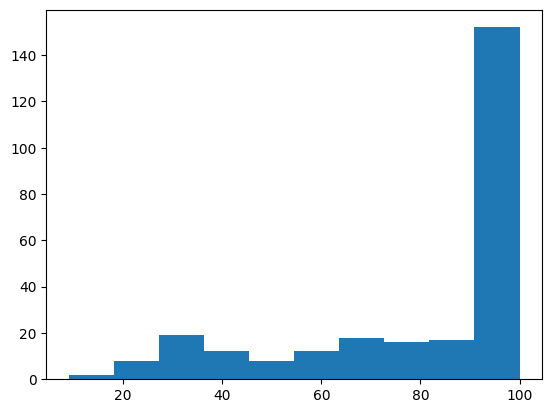

In [153]:
plt.hist(df['species'].value_counts())


In [154]:
df['species'].nunique()


264

In [155]:
df['bird_seen'].value_counts()


bird_seen
yes    16211
no      3364
Name: count, dtype: int64

(array([  487.,    37.,    53.,   130.,   241.,   637.,  1097.,  3223.,
         5251., 10219.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

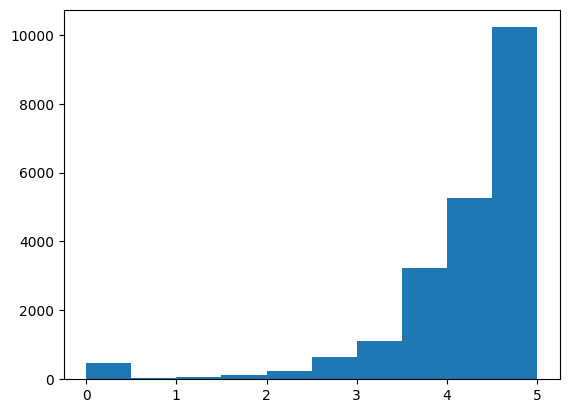

In [156]:
plt.hist(df['rating'])


In [157]:
import os
import matplotlib.pyplot as plt

#for loading and visualizing audio files
import librosa
import librosa.display

#to play audio
import IPython.display as ipd

audio_fpath = "../raw_data/local_samples/"
audio_clips = os.listdir(audio_fpath)
print("No. of .wav files in audio folder = ",len(audio_clips))


No. of .wav files in audio folder =  100


In [158]:
x, sr = librosa.load(audio_fpath+audio_clips[2], sr=44100)


x = x[:(sr*3)]
print(type(x), type(sr))
print(x.shape, sr)


<class 'numpy.ndarray'> <class 'int'>
(132300,) 44100


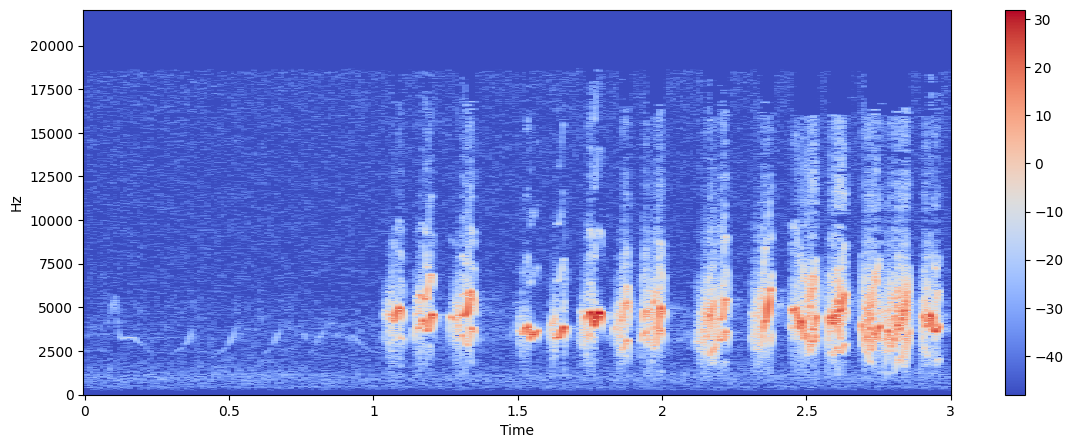

In [159]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()


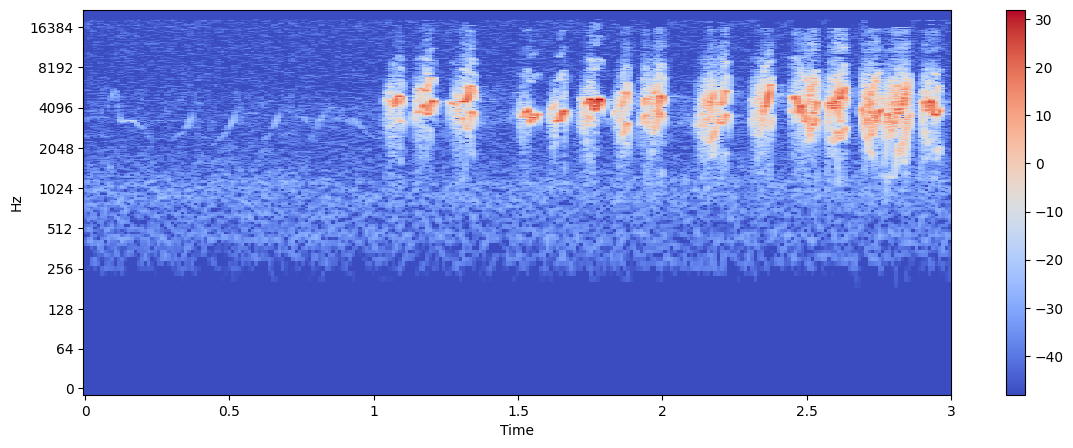

In [160]:


plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()


[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

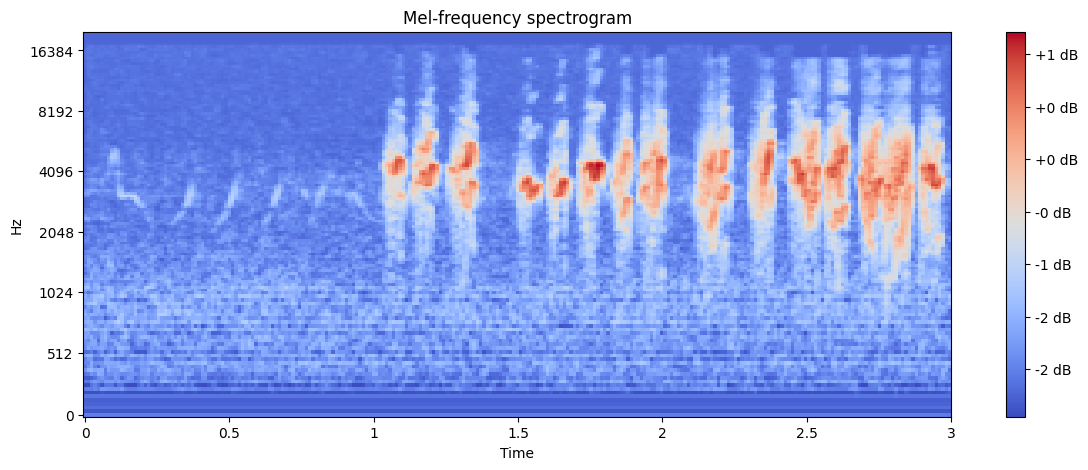

In [161]:
S = librosa.feature.melspectrogram(S=Xdb, sr=sr)
fig, ax = plt.subplots()

#S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S, x_axis='time',

                         y_axis='mel', sr=sr,

                         fmax=20000, ax=ax)

fig.colorbar(img, ax=ax, format='%+2.0f dB')
fig.set_figheight(5)
fig.set_figwidth(14)

ax.set(title='Mel-frequency spectrogram')


0.08173729


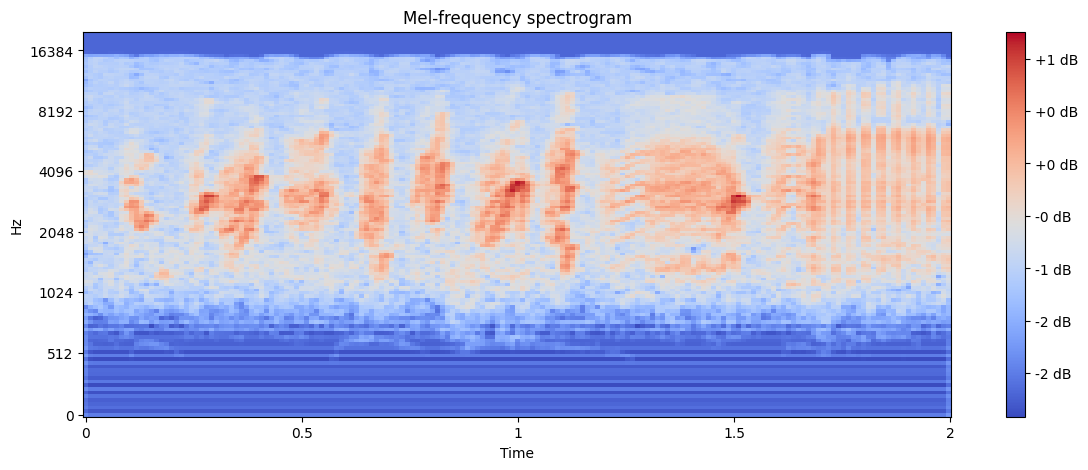

In [162]:
x, sr = librosa.load(audio_fpath+audio_clips[5], sr=44100)


x = x[sr:(sr*3)]
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
S = librosa.feature.melspectrogram(S=Xdb, sr=sr)
rms = librosa.feature.rms(S=S, frame_length=255)
fig, ax = plt.subplots()

#S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S, x_axis='time',

                         y_axis='mel', sr=sr,

                         fmax=20000, ax=ax)

fig.colorbar(img, ax=ax, format='%+2.0f dB')
fig.set_figheight(5)
fig.set_figwidth(14)

ax.set(title='Mel-frequency spectrogram')
print(rms.mean())


In [163]:
df_francedeg = df_france[df_france['rating'] <= 2.5]


In [164]:
df_francedeg.shape


(163, 35)

In [165]:
df_francedeg['filename'].sample()


7353    XC463852.mp3
Name: filename, dtype: object

In [166]:
df_francebien = df_france[df_france['rating'] > 2.5]


In [167]:
df_francebien.shape


(2543, 35)

In [168]:
(df_francebien['duration'].mean()/3)*df_francebien.shape[0]


38914.666666666664

In [169]:
df_francebien.filename.sample()


16556    XC360364.mp3
Name: filename, dtype: object

In [170]:
good_files = df_francebien['filename']


In [171]:
#good_files.to_csv('good_files.csv', index=False)


(128, 173)
0.013089565830380104


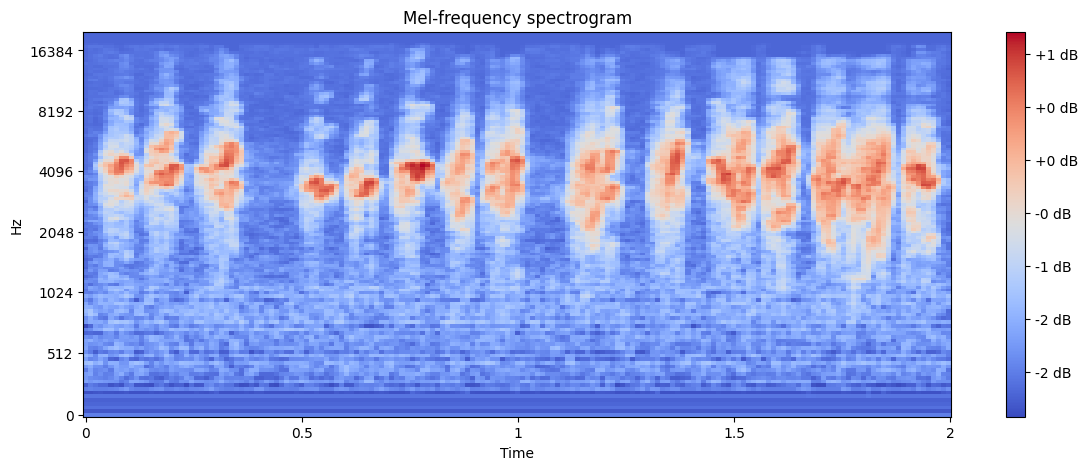

In [172]:
x, sr = librosa.load(audio_fpath+audio_clips[2], sr=44100)


x = x[sr:sr*3]
X = librosa.stft(x)
rms = librosa.feature.rms(S=X, frame_length=2048)
Xdb = librosa.amplitude_to_db(abs(X))
S = librosa.feature.melspectrogram(S=Xdb, sr=sr)
print(S.shape)
fig, ax = plt.subplots()

#S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S, x_axis='time',

                         y_axis='mel', sr=sr,

                         fmax=20000, ax=ax)

fig.colorbar(img, ax=ax, format='%+2.0f dB')
fig.set_figheight(5)
fig.set_figwidth(14)

ax.set(title='Mel-frequency spectrogram')
print(rms.mean())


(128, 259)


0.022068580957284648

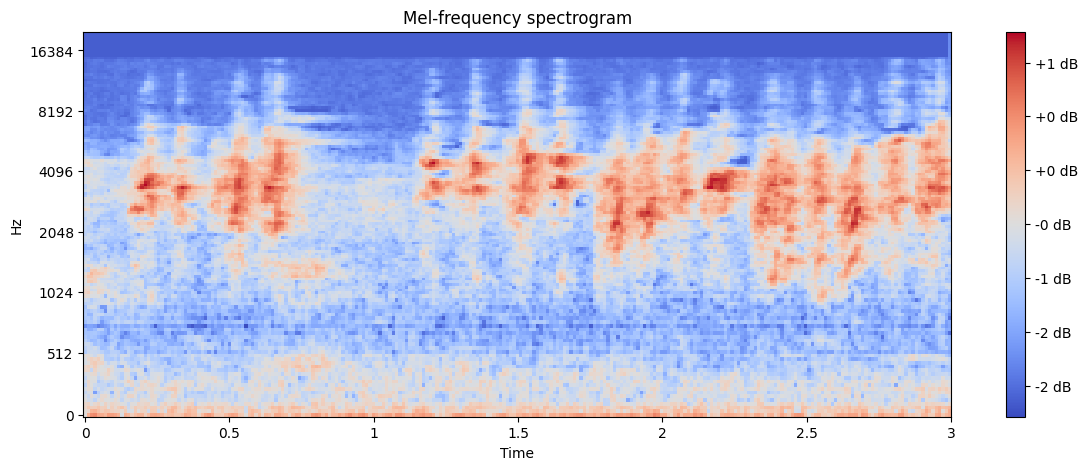

In [173]:
x, sr = librosa.load(audio_fpath+audio_clips[8], sr=44100)


x = x[sr:sr*4]
X = librosa.stft(x)
rms = librosa.feature.rms(S=X, frame_length=2048)
Xdb = librosa.amplitude_to_db(abs(X))
S = librosa.feature.melspectrogram(S=Xdb, sr=44100 )
print(S.shape)
fig, ax = plt.subplots()

#S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S, x_axis='time',

                         y_axis='mel', sr=sr,

                         fmax=20000, ax=ax)

fig.colorbar(img, ax=ax, format='%+2.0f dB')
fig.set_figheight(5)
fig.set_figwidth(14)

ax.set(title='Mel-frequency spectrogram')

rms.mean()


In [174]:
np.mean(rms[0, :]), np.min(rms[0, :])


(0.022068580957284648, 0.002685809156495545)

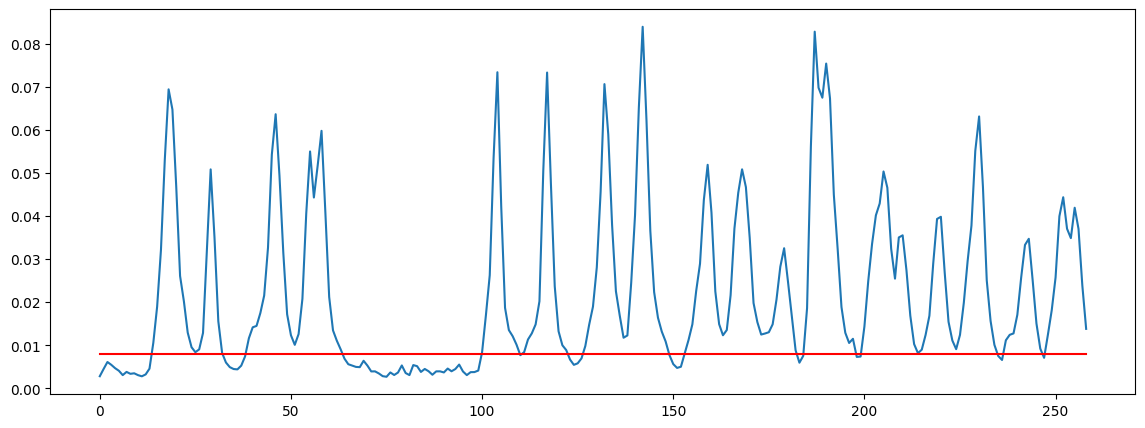

In [175]:
plt.figure(figsize=(14,5))
plt.plot(rms[0, :])
plt.plot([0.008 for i in range(len(rms[0, :]))], c='red')
